In [13]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from sklearn.datasets import load_digits

In [14]:
def get_labels(pts, centroids,klusters):
    y=True
    check=np.zeros(pts.shape[0])
    while y:
        #Посчитаем расстояния до центров
        dist=np.linalg.norm(pts-centroids[0,:],axis=1)
        for i in range(klusters-1):
            dist0 = np.linalg.norm(pts-centroids[i+1,:],axis=1)
            #Построим матрицу, где по столбцам записаны расстояния до пронумерованных центров
            dist=np.vstack((dist, dist0))
        dist=dist.T
        """
        dist=np.array([np.linalg.norm(pts-centroids[i,:],axis=1) for i in range(klusters-1)])
        dist=dist.T                            ##Вроде это и быстрее и короче и круче
        
        """
        #Получим метки для каждой точки
        labels=np.argmin(dist,axis=1)
        #Пересчитаем центры
        """
        offset=np.zeros((klusters,64))
        for i in range(klusters):
            if not pts[labels==i,:]==[]:
                offset[i]=np.mean(pts[labels==i,:],axis=0).copy()##Медленный!!!
        """
        offset=np.array([np.mean(pts[labels==i,:],axis=0) if not pts[labels==i,:]==[] else np.zeros(64) for i in range(klusters)])     
        
        if (labels==check).all():
            y=False
        else:
            centroids=offset.copy()
            check=labels.copy()
    return labels
##Вот сдесь вылетает DeprecationWarning!!!(узнать бы откуда =) )

In [15]:
digits = load_digits()
#Поменяем размерности для применения K-means 
Newdigits=digits.images.reshape(digits.images.shape[0],64)
#Применим K-means
klusters=10
centroids = np.array(Newdigits[:klusters])
labels = get_labels(Newdigits,centroids,klusters)
centroids=centroids.reshape(klusters,8,8)

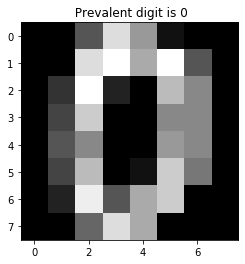

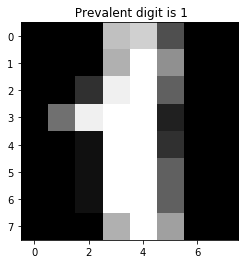

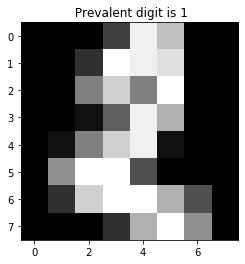

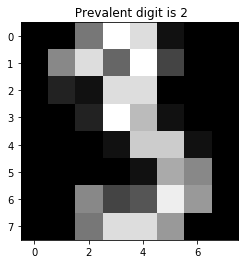

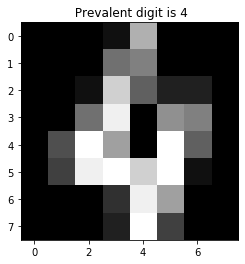

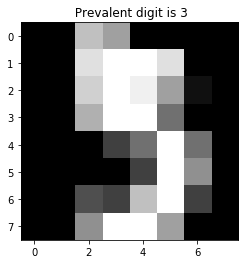

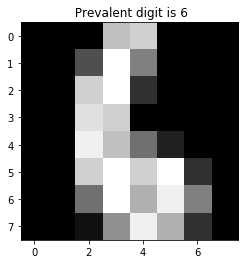

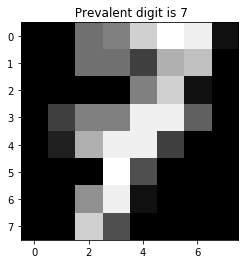

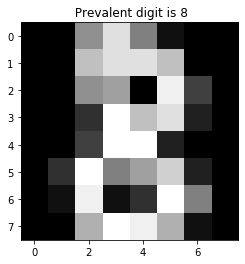

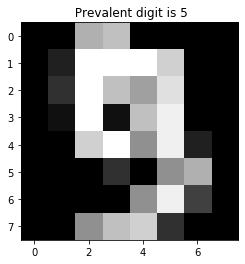

In [25]:
##Задание 1.
for i in range(klusters):    
    plt.imshow(centroids[i], cmap='gray')
    tmp=list(digits.target[labels==i])
    plt.title(' Prevalent digit is {}'.format(max(tmp,key=tmp.count)))
    plt.show()
    

In [28]:
##Задание 2.
def error_rate (classified_items):
    tmp=list(classified_items)
    prevalent_num=max(tmp,key=tmp.count)
    return len(classified_items[classified_items!=prevalent_num])/len(classified_items)
for i in range(klusters):
    print(f"Error rate of klaster {i} ::  {error_rate(digits.target[labels==i])}")

Error rate of klaster 0 ::  0.0111731843575419
Error rate of klaster 1 ::  0.16666666666666666
Error rate of klaster 2 ::  0.39325842696629215
Error rate of klaster 3 ::  0.16853932584269662
Error rate of klaster 4 ::  0.012269938650306749
Error rate of klaster 5 ::  0.5648648648648649
Error rate of klaster 6 ::  0.027624309392265192
Error rate of klaster 7 ::  0.1457286432160804
Error rate of klaster 8 ::  0.17682926829268292
Error rate of klaster 9 ::  0.09090909090909091


Text(0, 0.5, 'true digit')

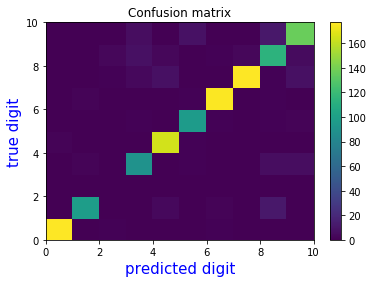

In [58]:
##Задание 3.
a=np.zeros((10,10))
for i in range(klusters):
    tmp=list(digits.target[labels==i])
    indx=max(tmp,key=tmp.count)
    for j in range(10):
        a[indx][j]=tmp.count(j)
    
plt.pcolor(a) # метод псевдографики pcolor    
plt.colorbar(pc)
plt.title('Confusion matrix')
plt.xlabel('predicted digit', fontsize=15, color='blue')
plt.ylabel('true digit', fontsize=15, color='blue')

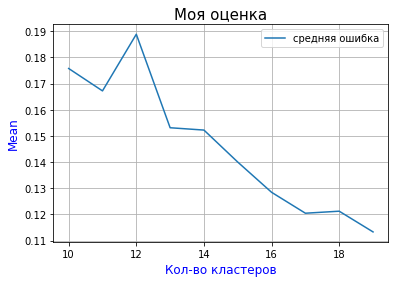

In [54]:
##Задание 4.
a=np.zeros(10)
for j in range(10):
    klusters_1=10+j
    centroids = np.array(Newdigits[:klusters_1])
    labels = get_labels(Newdigits,centroids,klusters_1)
    for i in range(klusters_1):
        a[j]+=error_rate(digits.target[labels==i])
    a[j]=a[j]/klusters_1

plt.plot(range(10,20),a,label='средняя ошибка')
plt.title('Моя оценка', fontsize=15)
plt.xlabel('Кол-во кластеров', fontsize=12, color='blue')
plt.ylabel('Mean', fontsize=12, color='blue')
plt.legend()
plt.grid(True)

    
##Я думаю , что самое подходящее число кластеров-14. Конечно, чем дальше тем меньше ошибка, 
##но большое кол-во кластеров делают всю информацию неинтересной нам.


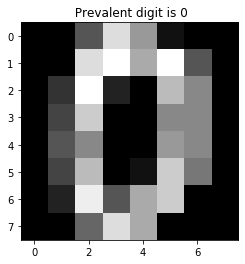

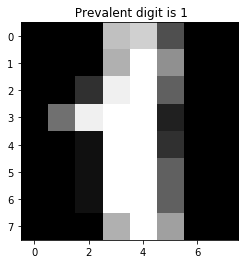

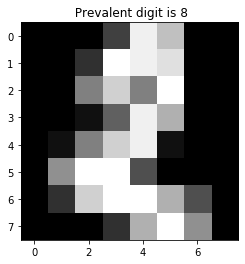

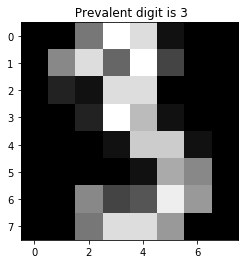

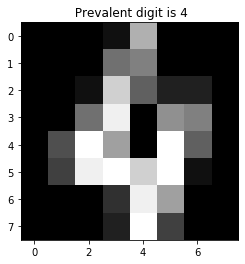

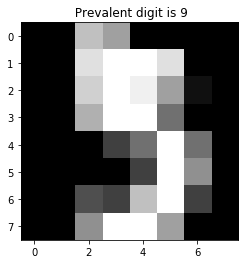

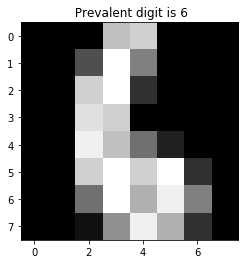

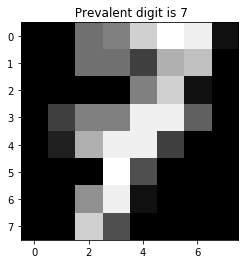

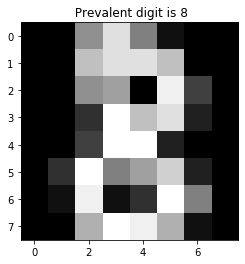

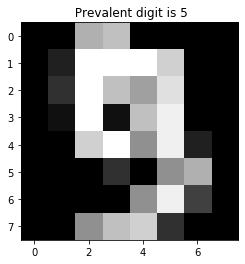

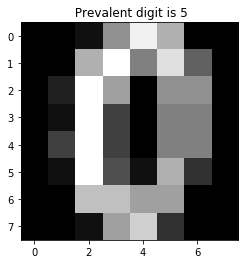

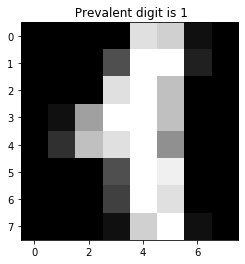

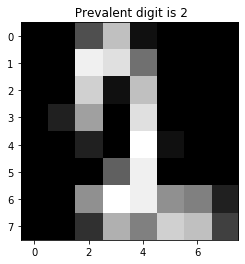

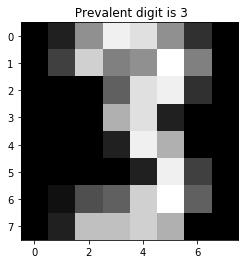

In [59]:
##Задание 5.
klusters_1=14
centroids = np.array(Newdigits[:klusters_1])
labels = get_labels(Newdigits,centroids,klusters_1)
centroids=centroids.reshape(klusters_1,8,8)
for i in range(klusters_1):    
    plt.imshow(centroids[i], cmap='gray')
    tmp=list(digits.target[labels==i])
    plt.title(' Prevalent digit is {}'.format(max(tmp,key=tmp.count)))
    plt.show()
##Один кластер имеют цифры:0 2 4 6 7 9
##Два и более кластеров имеют цифры:1 3 5 8

Text(0, 0.5, 'true digit')

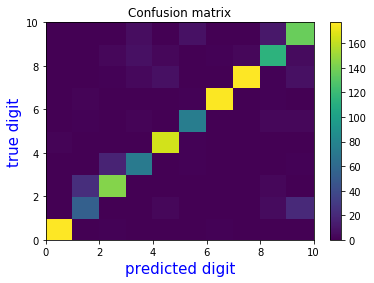

In [60]:
a=np.zeros((10,10))
for i in range(klusters_1):
    tmp=list(digits.target[labels==i])
    indx=max(tmp,key=tmp.count)
    for j in range(10):
        a[indx][j]=tmp.count(j)
    
plt.pcolor(a) # метод псевдографики pcolor    
plt.colorbar(pc)
plt.title('Confusion matrix')
plt.xlabel('predicted digit', fontsize=15, color='blue')
plt.ylabel('true digit', fontsize=15, color='blue')